In [170]:

%pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Open data frames and explore the data  
user_data = pd.read_csv('user_data.csv', encoding='Windows-1251')
# Display the first few rows of each dataframe
user_data.head()


,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [171]:
logs = pd.read_csv('logs.csv', encoding='Windows-1251')
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [172]:
# Check the size (number of rows and columns) of the dataframes 
logs.shape
user_data.shape

(2954, 3)

In [173]:
# Use the dtypes method to check the data types of each column  
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [174]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [175]:
# Show descriptive statistics of the dataframes 
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [176]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [177]:
# Check for missing values and get an overview of the dataset  user_data.info()

In [178]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   client    4500 non-null   int64 
 1   success   4500 non-null   bool  
 2   platform  4500 non-null   object
 3   time      4500 non-null   int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 92.4+ KB


In [179]:
# We haven't found any empty values. Moving to the next step.  

In [180]:
# We need an ambassador for our startup to promote our application. We want to find the most active users and meet with them.
# Find users with the highest number of correct answers.

In [181]:
# Count of success answers for every clients. Filter logs to keep only successful answers
count_answers = logs.query('success == True')
value_counts = count_answers.client.value_counts()
value_counts

client
28719    41
52870    41
61468    41
61473    41
12179    41
         ..
70028     1
37123     1
73522     1
38359     1
40921     1
Name: count, Length: 2845, dtype: int64

In [182]:
# Find the maximum number of successful answers for a single client  
max_success = value_counts.max()  
print("Max successful answers:", max_success)

Max successful answers: 41


In [183]:
# Find clients who have the maximum count of successful answers  
top_clients = value_counts[value_counts == max_success]  
print("\nClients with the most successful answers:\n", top_clients.index.sort_values())  


Clients with the most successful answers:
 Index([12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584], dtype='int64', name='client')


In [184]:
# Our startup has limited resources, so we need to determine the most popular platform and focus on it. Find the most popular platform.


In [185]:
# Find platform with the highest numbers of succes answers
logs_true = logs.query('success == True')
logs_true.platform.value_counts()


platform
phone       2019
computer    1090
tablet       180
Name: count, dtype: int64

In [186]:
# The platform "phone" had the highest number of successful answers

In [187]:
# Consider options for prioritizing the premium segment. Find the most popular platform among premium users.

In [188]:
merge_df = user_data.merge(logs, on='client', how='inner')
merge_df.head()

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918


In [189]:
only_premium = merge_df.query('premium == True')
only_premium.head()

,client,premium,age,success,platform,time
23,74867,True,27,False,computer,1585452086
24,49379,True,25,False,computer,1585433626
25,88203,True,35,True,phone,1585450059
30,32603,True,20,True,computer,1585473383
52,53182,True,24,True,phone,1585406474


In [190]:
only_premium.platform.value_counts()

platform
phone       246
computer    150
tablet       24
Name: count, dtype: int64

In [191]:
# The most popular platform for premium  clients is "phone"

In [192]:
counts_of_platforms = only_premium.platform.value_counts()


In [193]:
# We found the most popular platform among premium users. Now we want to compare the phone platform with others.

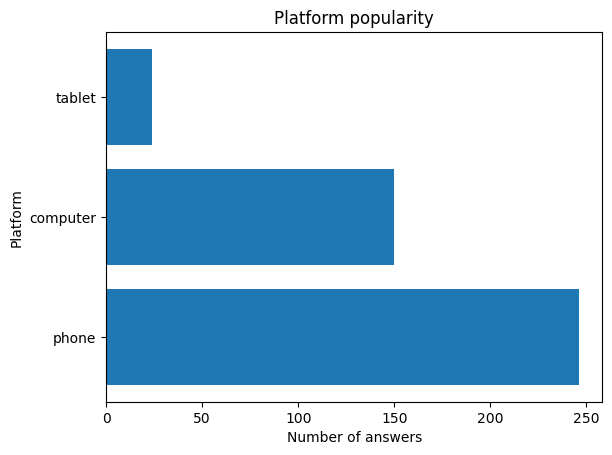

In [194]:
# Draw histagram
plt.barh(counts_of_platforms.index, counts_of_platforms .values)
plt.xlabel("Number of answers")
plt.ylabel("Platform")
plt.title("Platform popularity")
plt.show()

In [195]:
# We can say that the phone platform is significantly more popular than the computer. The tablet platform has the lowest position.

In [196]:
# If we want to focus on the premium segment, we need to find the proportion of failed answers out of all answers. 
# We will calculate the values for both segments.

In [197]:
# Let's find out which category of clients has a higher proportion of unsuccessful responses
proportion = merge_df.groupby(['premium', 'success'], as_index = False).agg({'client':'count'})
proportion

,premium,success,client
0,False,False,775
1,False,True,2244
2,True,False,117
3,True,True,303


In [198]:
# Transform to convinent form and add new column with rates
pivot_table = proportion.pivot(index = "premium", columns="success", values="client")
pivot_table['rate_unsuccess'] = pivot_table[False]/(pivot_table[False]+pivot_table[True])
pivot_table.head()

success,False,True,rate_unsuccess
premium,,,
False,775,2244,0.256708
True,117,303,0.278571


In [199]:
# "Premium" category has a higher rate of unsuccessful answers

In [200]:
# Should we continue focusing on the premium segment? Find the age differences between the premium and standard segments.

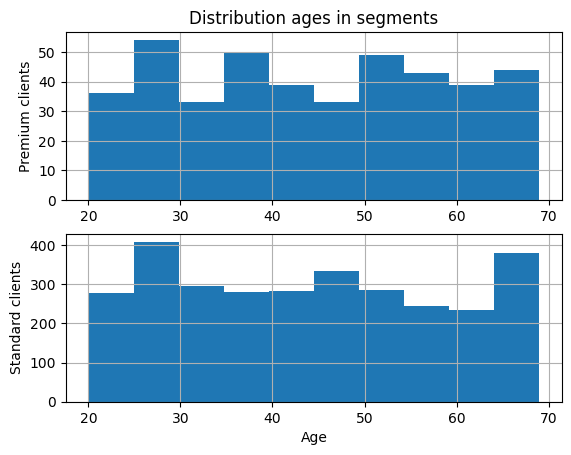

In [201]:
# Find age didtribution in premium and standard segments
premium_clients = merge_df.query('premium == True')
plt.subplot(2, 1, 1)
plt.hist(premium_clients['age'])
plt.title("Distribution ages in segments")
plt.ylabel("Premium clients")
plt.grid(True)
plt.subplot(2, 1, 2)
standard_clients = merge_df.query('premium == False')
plt.hist(standard_clients['age'])
plt.ylabel("Standard clients")
plt.xlabel("Age")
plt.grid(True) 

In [202]:
# Conclutions:
# Among the premium segment, the most popular age group is 25-30, with the lowest counts in the 35-45 and 50-60 ranges.
# Among the standard segment, the most popular age groups are 25-30 (or 25-35), with the lowest counts in the 45-50 and 65+ ranges.

In [203]:
# Now that we know more about the premium segment, we have decided to work with both segments. First, we want to analyze successful and unsuccessful answers.

In [204]:
# Display distribution of count success answers by clients
logs_true = logs.query('success == True')
logs_series = logs_true.client.value_counts()
logs_series = logs_series.rename('true_answers')
logs_series


client
28719    41
52870    41
61468    41
61473    41
12179    41
         ..
70028     1
37123     1
73522     1
38359     1
40921     1
Name: true_answers, Length: 2845, dtype: int64

<Axes: xlabel='true_answers', ylabel='count'>

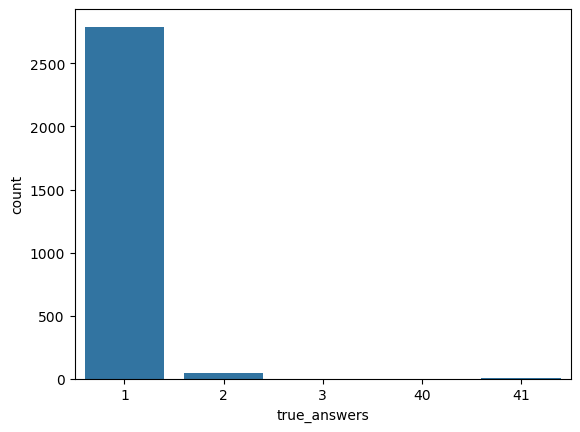

In [205]:
# Draw countplot
sns.countplot(x = logs_series)

In [206]:
# The most of observations are concentrated on the left and only a few users have more than 40 success answers.

In [207]:
# Find how many true answers give users on computer platform. Draw histagram
users_on_computer = merge_df.query("success == True and platform == 'computer'")
users_on_computer.head()

,client,premium,age,success,platform,time
3,11989,False,44,True,computer,1585403698
12,32406,False,24,True,computer,1585479382
14,62404,False,40,True,computer,1585430097
20,68848,False,35,True,computer,1585440553
26,49675,False,48,True,computer,1585402108


<Axes: xlabel='age', ylabel='count'>

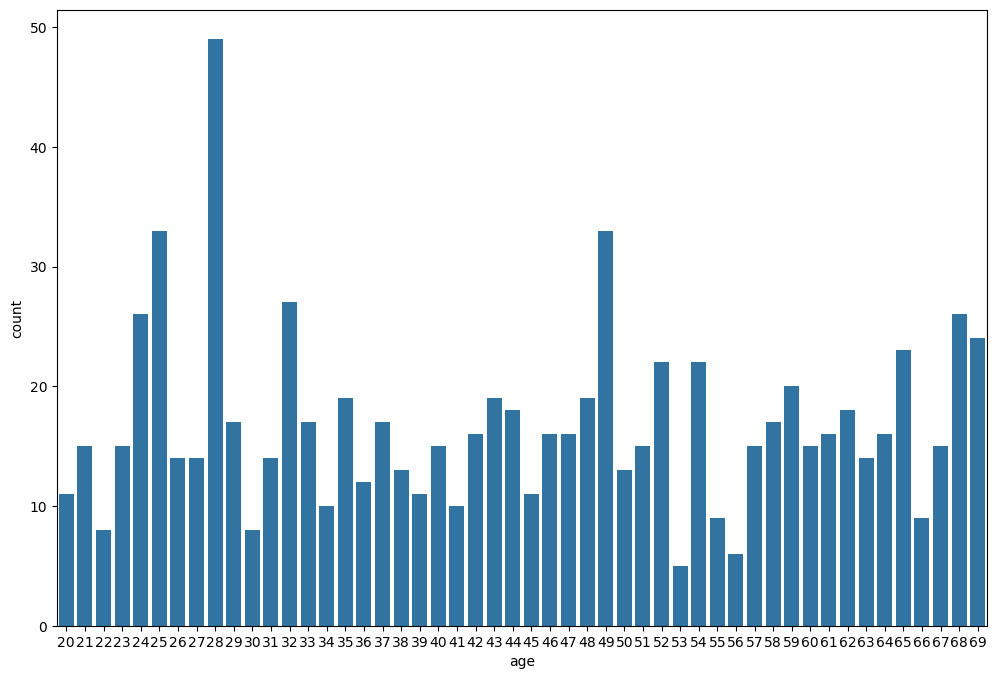

In [208]:
plt.figure(figsize=(12, 8))
sns.countplot(data = users_on_computer, x = 'age')

In [209]:
# Users 28 ages gave the hirest number of true answers.

<Axes: xlabel='age', ylabel='count'>

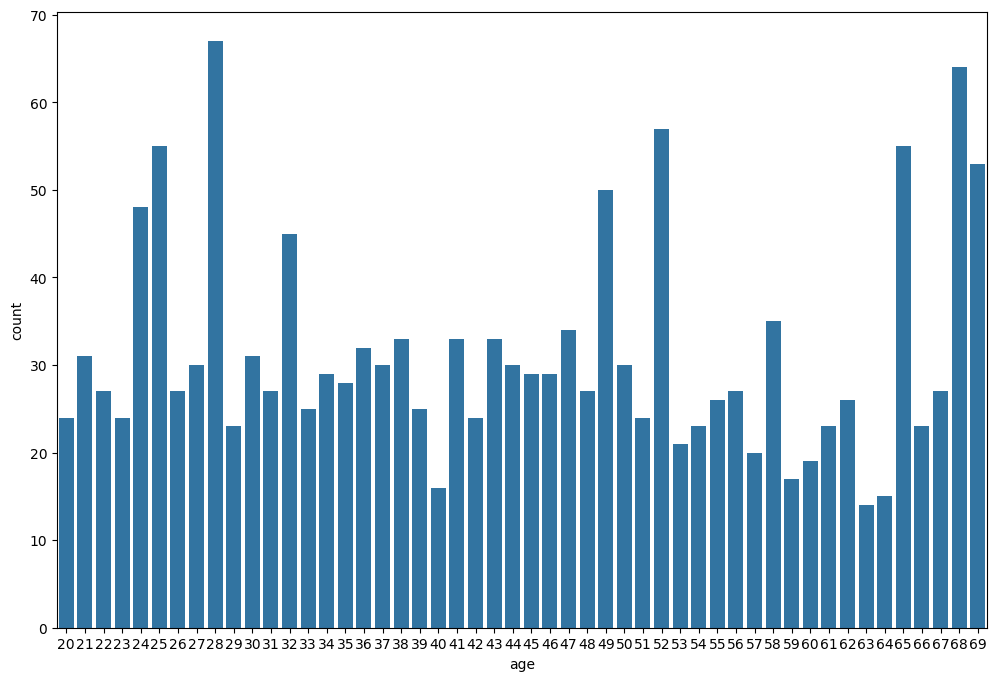

In [210]:
# Find how many true answers give users on phone platform. Draw histagram
users_on_phone = merge_df.query("success == True and platform == 'phone'")
plt.figure(figsize=(12, 8))
sns.countplot(data = users_on_phone, x = 'age')

In [211]:
# Users aged 28 gave the highest number of true answers, the same as on the computer platform. Users aged 68  were active too.

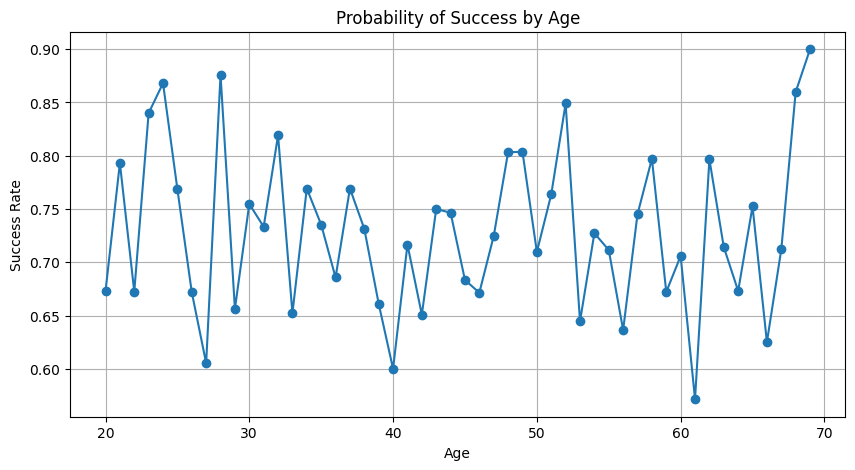

In [212]:
# Make deeper analysis and find extra information.
# Find how to change probability of correct answer depending on ages?
success_by_age = merge_df.groupby('age')['success'].mean()

plt.figure(figsize=(10, 5))
plt.plot(success_by_age.index, success_by_age.values, marker='o', linestyle='-')
plt.xlabel("Age")
plt.ylabel("Success Rate")
plt.title("Probability of Success by Age")
plt.grid(True)
plt.show()

In [213]:
# The most successful answers were given by users aged 20-26, 28, 30-33, 47-49, 52, 58, and 67-68.


In [ ]:
# Find probability give success or fail answers depend on platform.

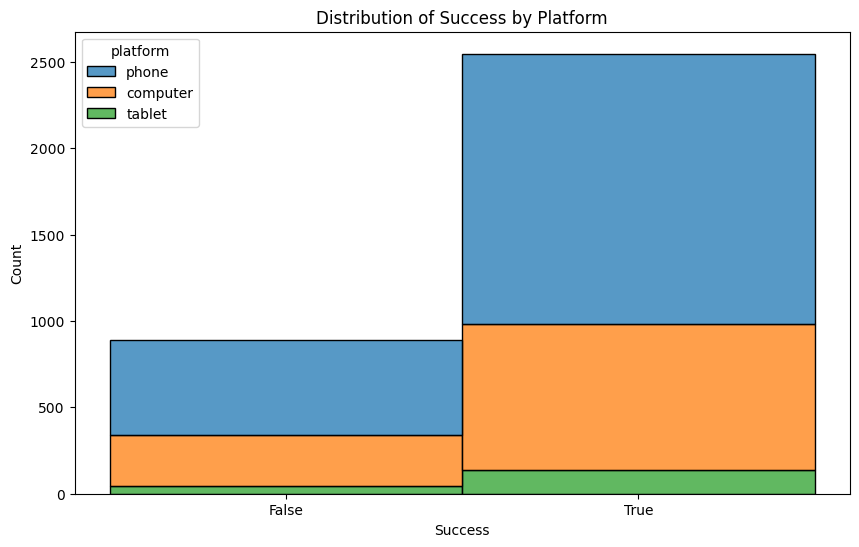

In [214]:
plt.figure(figsize=(10, 6))
sns.histplot(data=merge_df.dropna(), x='success', hue='platform', multiple='stack', bins=2, discrete=True)

plt.xticks([0, 1], ["False", "True"])  
plt.xlabel("Success")
plt.ylabel("Count")
plt.title("Distribution of Success by Platform")
plt.show()